# GA Data Science (DAT14)

## K-Means Clustering


### Create Random Data Set

In the last few weeks, we've studied classifiers - KNN, Naive Bayes, and Logistic Regression. These are algorithms that are trainined on a dataset and are then tasked with accurately "classifying" a new data point with the appropriate label. 

Kmeans is in a different class of algorithms, called clustering. It is an unsupervised approach meaning that it is not presented with labels. Instead it is presented with a dataset and it is tasked with finding the clusters inherent in the data.

Assignment: generate a series of 80 data points in 2 dimensions (x,y) with the following properties:

- there should be 4 clusters of points
- each cluster should be formed by points whose coordinates come from a 2D gaussian
- the 2D gaussians should have the following centers:
- [1,1] , [1,3], [3,1], [3,3]
- they should have variance of 0.1, and 0 covariance

np.random.multivariate takes 3 parameters:
- mean
- covariance
- number of samples

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In the Code below, np.random.multivariate_normal samples from a gaussian distribution to generate a collection of points. Let's first get comfortable with sampling from a distrubtion. 


In [2]:
sample = np.random.multivariate_normal([1,1],[[.1,0],[0,.1]],20)

print sample

[[ 0.35082516  1.07543579]
 [ 0.73609579  1.07168779]
 [ 1.10816999  0.99964738]
 [ 1.12470729  0.40962342]
 [ 1.01273624  1.47141853]
 [ 0.83605007  1.17879124]
 [ 1.21368602  1.00398842]
 [ 1.16858234  1.34302549]
 [ 0.34802972  1.03440298]
 [ 1.03278545  0.86917806]
 [ 0.52400452  1.3117144 ]
 [ 0.88041139  0.86770977]
 [ 0.79336244  1.0784233 ]
 [ 1.15129146  1.36445176]
 [ 1.3747772   1.43721158]
 [ 0.37649425  1.29279021]
 [ 1.92100377  0.32713742]
 [ 1.22892921  1.83068046]
 [ 0.74756814  1.13309944]
 [ 1.41552703  1.1278586 ]]


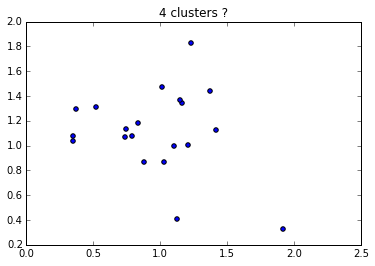

In [3]:
plt.scatter(sample[:,0], sample[:,1])
plt.title('4 clusters ?')
plt.show()

Now let's create our clusters .... 

In [4]:
data = np.vstack([np.random.multivariate_normal([1,1],[[.1,0],[0,.1]],20),
                 np.random.multivariate_normal([1,3],[[.1,0],[0,.1]],20),
                 np.random.multivariate_normal([3,1],[[.1,0],[0,.1]],20),
                 np.random.multivariate_normal([3,3],[[.1,0],[0,.1]],20)])

In [5]:
data[:10,:]

array([[ 0.41279558,  0.30758831],
       [ 1.1554709 ,  1.03054948],
       [ 0.35581066,  0.91426202],
       [ 0.96787538,  1.21319316],
       [ 1.25611755,  1.04445247],
       [ 1.36387632,  0.99296929],
       [ 1.10548838,  0.67324133],
       [ 1.18468821,  0.4232645 ],
       [ 1.27861233,  0.83067389],
       [ 1.04557718,  0.69027306]])

Plot the points

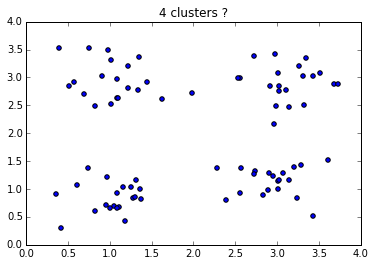

In [6]:
plt.scatter(data[:,0], data[:,1])
plt.title('4 clusters ?')
plt.show()

###Load the KMeans Class from sklearn.cluster

In [7]:
from sklearn.cluster import KMeans

Initialize a KMeans classifier with 4 cluster, random initialization, random_state=1, 1 initial centroid seed and maximum number of iterations equal to 1

In [8]:
km = KMeans(n_clusters=4,  init='random', n_init=1 , max_iter = 1, random_state=1)

Train the classifier on all the data

In [9]:
km.fit(data)

KMeans(copy_x=True, init='random', max_iter=1, n_clusters=4, n_init=1,
    n_jobs=1, precompute_distances=True, random_state=1, tol=0.0001,
    verbose=0)

Extract the coordinates of the cluster centers

In [10]:
centroids = km.cluster_centers_
centroids

array([[ 2.93466656,  3.08756827],
       [ 1.10482011,  1.41541714],
       [ 0.86312559,  3.17113982],
       [ 3.06717301,  1.67454455]])

Predict the clusters for each data point

In [12]:
y = km.predict(data)
print y

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2
 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 3 0 0 0 0 0]


Plot the points with a different color for each cluster. Plot also the centroids in Red

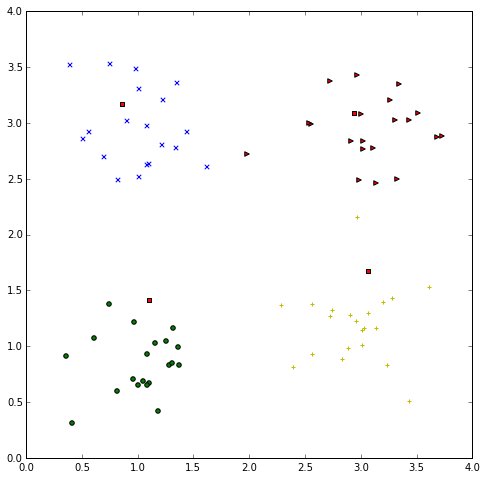

In [13]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
for t,marker,c in zip(xrange(4),">ox+","rgby") :
    ax.scatter(data[y == t,0],
                data[y == t,1],
                marker=marker,
                c=c)

ax.scatter(centroids[:,0],centroids[:,1],marker = 's',c='r')

#### Discussion: what do you see?

Let's try with better parameters. Initialize a KMeans classifier with 4 clusters, improved initialization, 10 initial centroid seeds and maximum number of iterations equal to 300.

In [14]:
km = KMeans(n_clusters=4, init='k-means++', n_init=10 , max_iter = 300, random_state=1)

Condense the steps above in a handy function that receives the data and the classifier as input parameters and returns the figure. Make sure you are aware of the number of clusters

In [15]:
def do_kmeans_4(km, data):
    km.fit(data)
    centroids = km.cluster_centers_
    print "centroids:", centroids
    y = km.predict(data)
    
    
    fig, ax = plt.subplots(1,1, figsize=(8,8))
    for t,marker,c in zip(xrange(4),">ox+","rgby") :
        ax.scatter(data[y == t,0],
                   data[y == t,1],
                   marker=marker,
                   c=c)

    ax.scatter(centroids[:,0],centroids[:,1],marker = 's',c='r')

centroids: [[ 1.05590003  2.9486444 ]
 [ 3.12604609  2.90844841]
 [ 1.0208082   0.84783735]
 [ 2.9420467   1.14715255]]


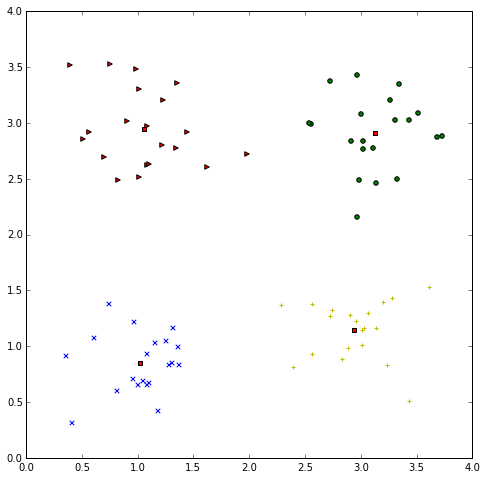

In [16]:
do_kmeans_4(km, data)

### Blurred boundaries

Generate new datapoints that have a bigger variance of 0.5, around the same centroids

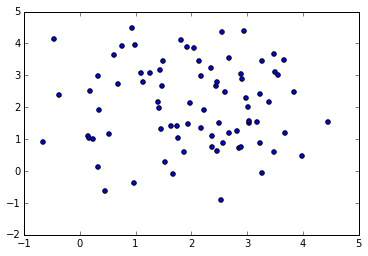

In [17]:
data1 = np.vstack([np.random.multivariate_normal([1,1],[[.5,0],[0,.5]],20),
                 np.random.multivariate_normal([1,3],[[.5,0],[0,.5]],20),
                 np.random.multivariate_normal([3,1],[[.5,0],[0,.5]],20),
                 np.random.multivariate_normal([3,3],[[.5,0],[0,.5]],20)])
plt.scatter(data1[:,0], data1[:,1])

Initialize a new kmeans classifier

In [18]:
km = KMeans(n_clusters=4, random_state=1)

Use the previously defined function to fit and plot the new data

centroids: [[ 2.86817353  3.08171514]
 [ 0.91847612  0.83566508]
 [ 0.93033078  3.28636195]
 [ 2.90120069  1.03717989]]


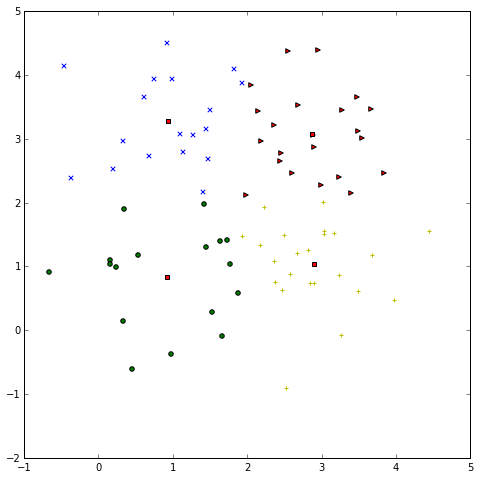

In [19]:
do_kmeans_4(km, data1)

Repeat the above with 150 points per cluster

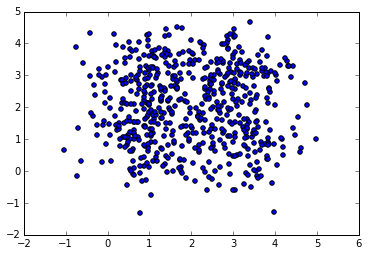

In [20]:
data1 = np.vstack([np.random.multivariate_normal([1,1],[[.5,0],[0,.5]],150),
                 np.random.multivariate_normal([1,3],[[.5,0],[0,.5]],150),
                 np.random.multivariate_normal([3,1],[[.5,0],[0,.5]],150),
                 np.random.multivariate_normal([3,3],[[.5,0],[0,.5]],150)])
plt.scatter(data1[:,0], data1[:,1])

centroids: [[ 3.1219438   0.87727946]
 [ 1.00475855  3.0388308 ]
 [ 3.07731105  3.03958069]
 [ 0.89587161  0.99116236]]


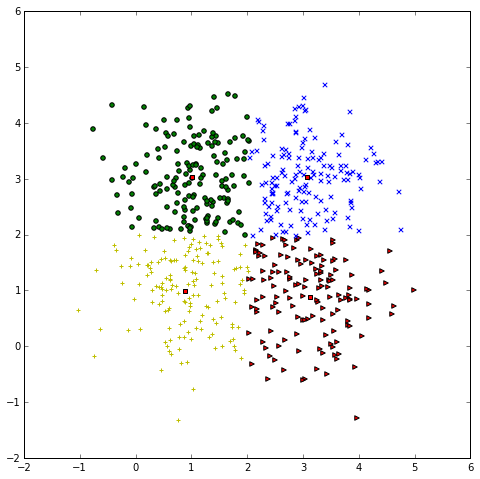

In [21]:
do_kmeans_4(km, data1)

#### Discussion: what do you see?

## Let's find clusters in the Iris Dataset

Import the data from the iris dataset in sklearn, generate X and y arrays

In [22]:
from sklearn import datasets

iris = datasets.load_iris()

X = iris['data']
Names = iris['feature_names']
target_names = iris['target_names']
y = iris['target']

Display the features names

In [25]:
Names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Plot the Sepal width versus Petal Width with colors according to species

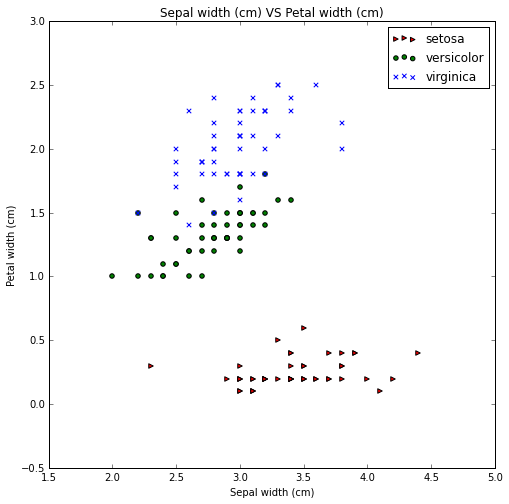

In [26]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
for t,marker,c,n in zip(xrange(3),">ox","rgb",target_names):
    ax.scatter(X[y == t,1],
               X[y == t,3],
               marker=marker,
               c=c,
               label=n)

plt.xlabel('Sepal width (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Sepal width (cm) VS Petal width (cm)')
plt.legend(loc='best')
plt.show()

### Exercise 1: Implement Kmeans on Iris Data Set
Even though the Iris Data Set has labels, the Kmeans algorithms will not take these labels as input. So we'll see how well it does at figuring out these labels on its own

### Using 3 clusters, fit and and predict using Kmeans

### Exercise 2: Plot Results
#### Here's code for plotting the true clusters as the first of two subplots.  

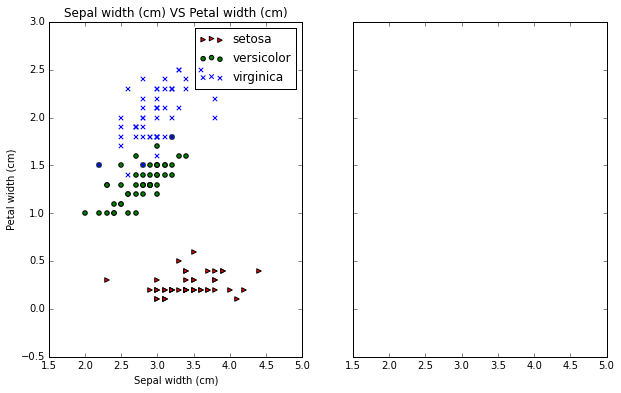

In [27]:
fig, (ax1, ax2) = plt.subplots( 1,2, figsize=(10,6), sharex=True, sharey=True)

## first the true clusters
for t,marker,c,n in zip(xrange(3),">ox","rgb",target_names):
    ax1.scatter(X[y == t,1],
               X[y == t,3],
               marker=marker,
               c=c,
               label=n)

ax1.set_xlabel('Sepal width (cm)')
ax1.set_ylabel('Petal width (cm)')
ax1.set_title('Sepal width (cm) VS Petal width (cm)')
ax1.legend(loc='best')


#### Add code to plot the results from the Kmeans as second subplot 
#### (Hint: Code is very similar to first plot, use ax2 as name of second plot)

In [ ]:
#from sklearn.cluster import KMeans
#km = KMeans(n_clusters=4,  init='random', n_init=1 , max_iter = 1, random_state=1)
#km.fit(data) 

#### After adding code for subplot run the code below to view the results.
#### How well does Kmeans perform?
#### What are the pros and cons of unsupervised learning?

In [28]:
plt.show()

#plt.scatter(data[:,0], data[:,1])
#plt.title('4 clusters ?')
#plt.show()

### Exercise 3: Silhouette Scores

### Silhouette score

In [29]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

km = KMeans(n_clusters=3, random_state=1)
km.fit(X)
labels = km.labels_
metrics.silhouette_score(X, labels, metric='euclidean')

0.5525919445213674

### calculate the Silhouette score for the values of k between 2-10

In [36]:
# use a for loop to generate values of k, fit and label data, append the scores to a list, and print the scores







### Exercise 4: Create your own Sum of Squared Errors function

In [31]:
# reseting the labels to 3 clusters 
km = KMeans(n_clusters=3, random_state=1)
km.fit(X)
labels = km.labels_

# start by calculating the mean for each cluster
# you can check your answer with 
km.cluster_centers_



# for each cluster substract the mean from each data point to get the error
# then get the magnitude of each error, square it, and sum it







In [ ]:
# similar to the loop before
# generate values of k, fit and label data, append Sum of Squared Errors scores to a list, and print the scores







### Exercise 5: Plot the SSE score next to the Silhouette scores

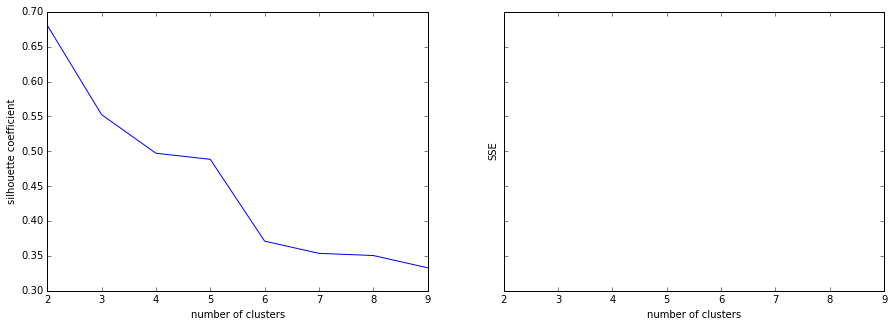

In [35]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), sharex=True, sharey=True)

ax1.plot(k_clusters, scores)
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhouette coefficient')

# plot here on ax2

ax2.set_xlabel('number of clusters')
ax2.set_ylabel('SSE');